<a href="https://colab.research.google.com/github/eshaanmathakari/shrimpInfectionDetection/blob/main/Shrimp_R3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train= ImageDataGenerator(rescale=1/255)

In [3]:
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset = train.flow_from_directory(r"dataset/Image_dataset/train",target_size=(200,200),batch_size =3, class_mode='binary')

Found 155 images belonging to 2 classes.


In [5]:
validation_dataset = train.flow_from_directory(r"dataset/Image_dataset/valid",target_size=(200,200),batch_size =3, class_mode='binary')

Found 31 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'healthy': 0, 'wssv': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

/Users/prasunndubey/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [10]:
modelfit = model.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35


/Users/prasunndubey/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/64 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.5934 - loss: 3.0514

/Users/prasunndubey/miniconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.6104 - loss: 2.7311 - val_accuracy: 0.8387 - val_loss: 0.4709
Epoch 2/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.6941 - loss: 0.6347 - val_accuracy: 0.8387 - val_loss: 0.5119
Epoch 3/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.7916 - loss: 0.5668 - val_accuracy: 0.8387 - val_loss: 0.3810
Epoch 4/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.8116 - loss: 0.4584 - val_accuracy: 0.8387 - val_loss: 0.3590
Epoch 5/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.8275 - loss: 0.4055 - val_accuracy: 0.8065 - val_loss: 0.5628
Epoch 6/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.9393 - loss: 0.3597 - val_accuracy: 0.8710 - val_loss: 0.2216
Epoch 7/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.9303 - loss: 0.1262 - val_accuracy: 1.0000 - val_loss: 0.0238
Epoch 8/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9695 - loss: 0.2522 - val_accuracy: 0.9677 - v

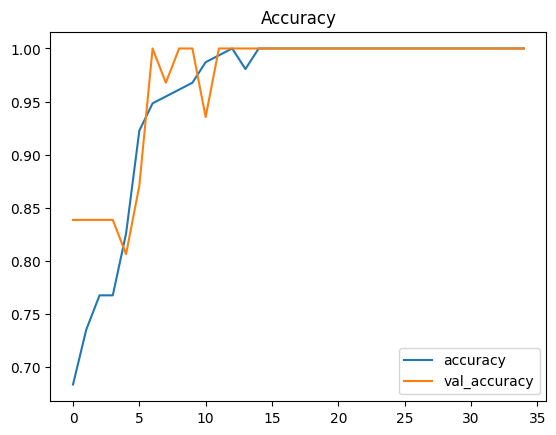

In [11]:
pd.DataFrame(modelfit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

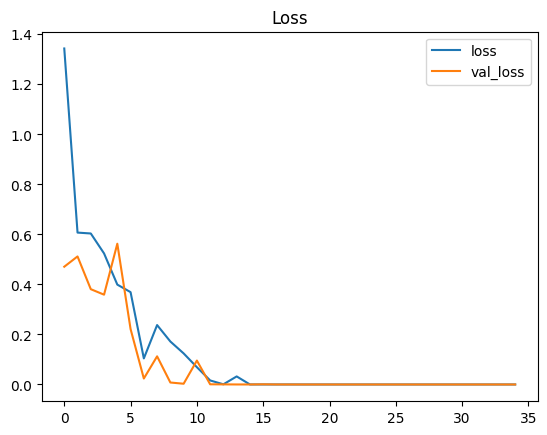

In [12]:
pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [17]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten,Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D,GlobalMaxPool2D
base_model1 = EfficientNetB0(
                input_shape=(200, 200, 3),
                weights='imagenet',
                include_top=False
                )


for layer in base_model1.layers[:15]:
    layer.trainable = False
x = base_model1.output
x = GlobalMaxPool2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions1 = Dense(1, activation='sigmoid')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [18]:
model1.compile(loss= 'binary_crossentropy', optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [19]:
modelfit = model1.fit(train_dataset,
                    steps_per_epoch=64,
                    epochs=35,
                    validation_data = validation_dataset)

Epoch 1/35
52/64 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.6035 - loss: 7.5292

/Users/prasunndubey/miniconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 273ms/step - accuracy: 0.6186 - loss: 6.9031 - val_accuracy: 0.1613 - val_loss: 0.8466
Epoch 2/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - accuracy: 0.6701 - loss: 2.1693 - val_accuracy: 0.8387 - val_loss: 0.4954
Epoch 3/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7752 - loss: 0.9169 - val_accuracy: 0.8387 - val_loss: 0.6489
Epoch 4/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step - accuracy: 0.7759 - loss: 0.7903 - val_accuracy: 0.8387 - val_loss: 0.4996
Epoch 5/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.7190 - loss: 0.7331 - val_accuracy: 0.8387 - val_loss: 0.5555
Epoch 6/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.7767 - loss: 0.7163 - val_accuracy: 0.8387 - val_loss: 0.4535
Epoch 7/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7303 - loss: 0.7437 - val_accuracy: 0.8387 - val_loss: 0.7055
Epoch 8/35
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 247ms/step - accuracy: 0.7733 - loss: 0.6283 - val_accuracy: 0.258

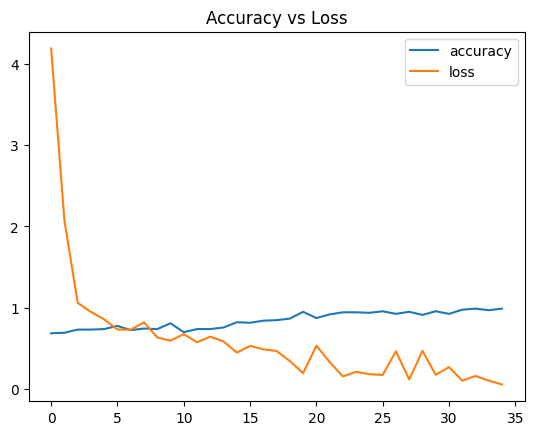

In [20]:
pd.DataFrame(modelfit.history)[['accuracy','loss']].plot()
plt.title("Accuracy vs Loss")
plt.show()

In [21]:
model1.save("efficientnet_model.h5")

In [ ]:
#as val_acccuracy and val_loss was very varying
#pd.DataFrame(modelfit.history)[['loss','val_loss']].plot()
#plt.title("Loss")
#plt.show()


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf

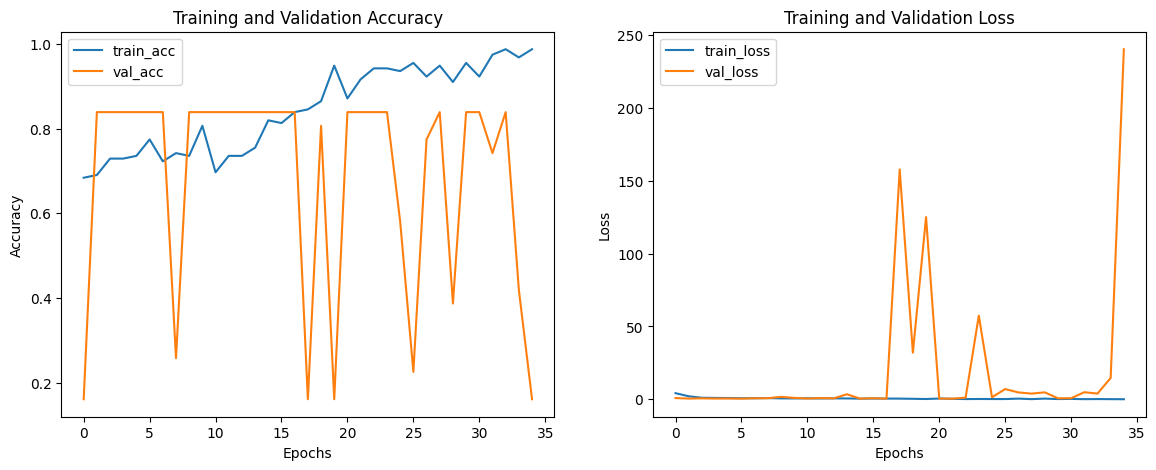

In [23]:
# 1. Plot training & validation accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_curves(modelfit)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step


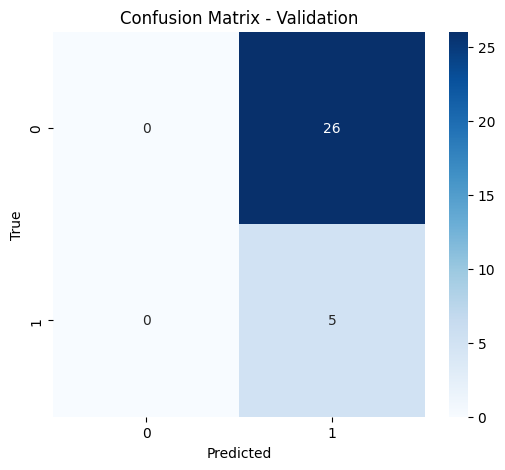

Classification Report - Validation Set
              precision    recall  f1-score   support

     healthy       0.00      0.00      0.00        26
        wssv       0.16      1.00      0.28         5

    accuracy                           0.16        31
   macro avg       0.08      0.50      0.14        31
weighted avg       0.03      0.16      0.04        31



/Users/prasunndubey/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/prasunndubey/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/prasunndubey/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [24]:
# 2. Confusion Matrix and Classification Report on Validation Set

# Step 1: Get true labels and predicted probabilities from validation data
val_steps = validation_dataset.samples // validation_dataset.batch_size + 1
pred_probs = model1.predict(validation_dataset, steps=val_steps)
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# Step 2: True labels from generator
y_true = validation_dataset.classes[:len(y_pred)]

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print("Classification Report - Validation Set")
print(classification_report(y_true, y_pred, target_names=list(validation_dataset.class_indices.keys())))

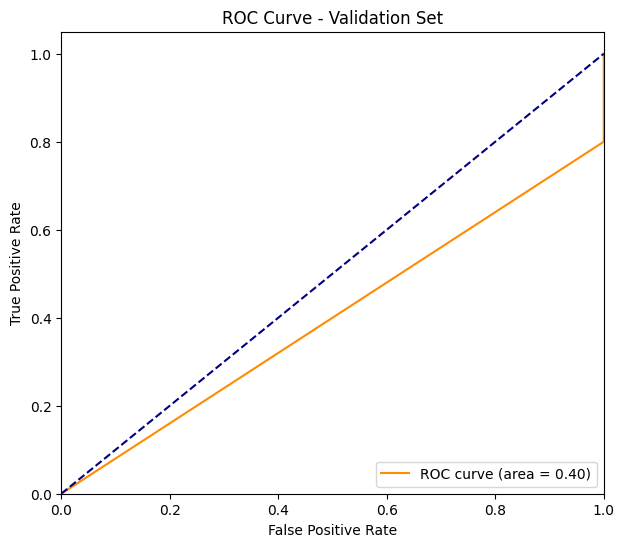

In [25]:
# 3. ROC Curve + AUC

fpr, tpr, thresholds = roc_curve(y_true, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.show()

In [26]:
# 4. Sample predictions with images and Grad-CAM visualization

import cv2

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array / 255.0

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    cv2.imwrite(cam_path, superimposed_img)
    return plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))

/var/folders/03/kfll50y57f54m8n_nskymhd40000gn/T/ipykernel_18355/3300697363.py:35: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


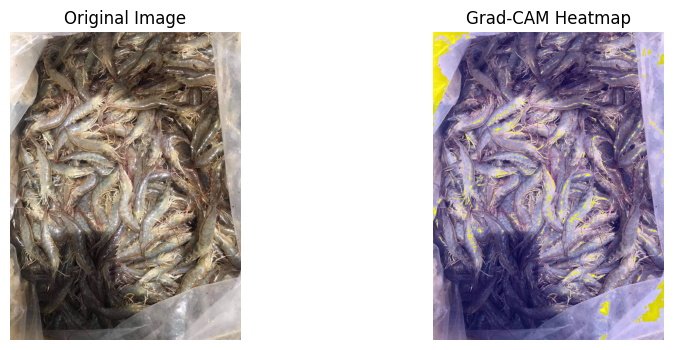

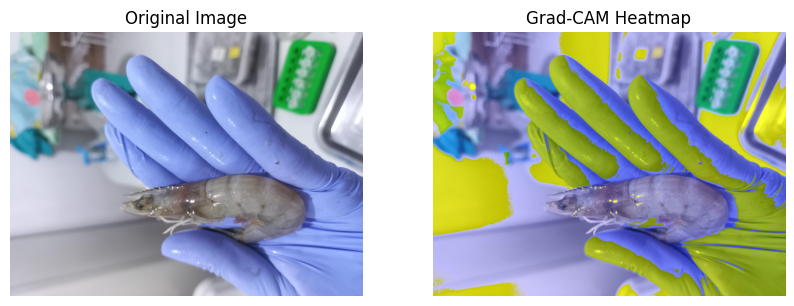

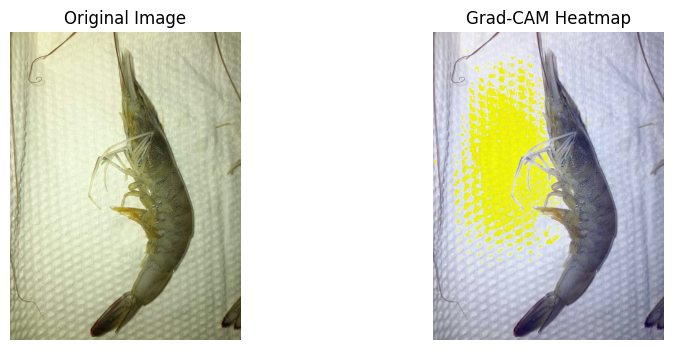

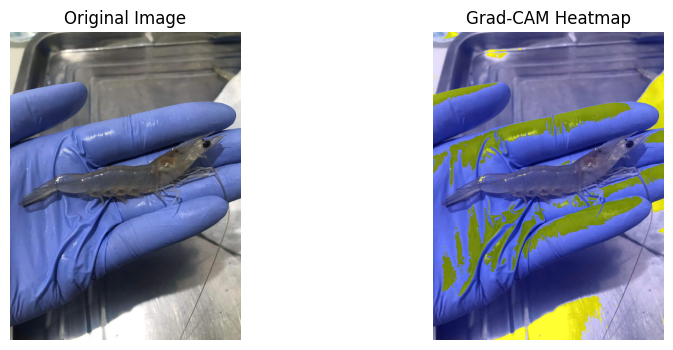

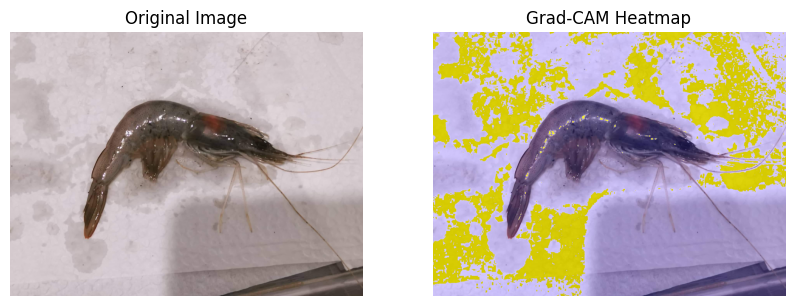

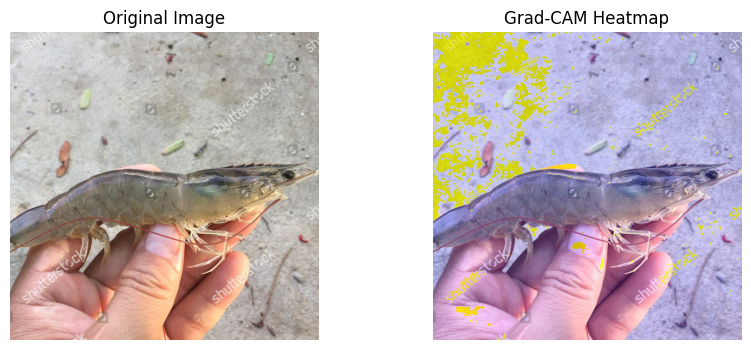

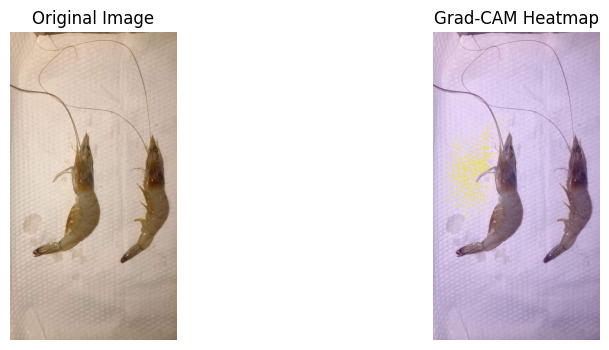

In [30]:
# Example: Pick some test images and show Grad-CAM
last_conv_layer = "top_conv"  # EfficientNetB0 last conv layer name (check with model1.summary())

sample_img_paths = ['dataset/Image_dataset/valid/healthy/healthy-24_jpg.rf.ca000b2965bf948fe520f9f8c891d9b7.jpg','dataset/Image_dataset/valid/healthy/healthy-67_jpg.rf.5400cf76e42189a71c7897bab3d4b466.jpg','dataset/Image_dataset/valid/healthy/healthy-59_jpg.rf.4f6cbe18235598ac4cc34c495ac1b1a5.jpg','dataset/Image_dataset/valid/wssv/wssv-7_jpg.rf.21c6f59321b014e5202b2953a0d74fda.jpg','dataset/Image_dataset/valid/wssv/wssv-17_jpg.rf.d9df90be02b816c65c98f67ae3d028e7.jpg','dataset/Image_dataset/valid/healthy/stock-photo-vietnamese-whiteleg-shrimp-litopenaeus-vannamei-1066100792_jpg.rf.da4c5e8aedb0ba15fc276cf52036067a.jpg','dataset/Image_dataset/valid/healthy/healthy-50_jpg.rf.14e709ff7504e89536e79f2440513902.jpg']  # Fill with paths of some test images (e.g. validation_dataset filepaths if available)
# If validation_dataset does not expose filenames, use your own test folder images

for img_path in sample_img_paths:
    img_array = get_img_array(img_path, size=(200,200))
    heatmap = make_gradcam_heatmap(img_array, model1, last_conv_layer)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
    plt.title("Original Image")
    plt.axis('off')
    plt.subplot(1,2,2)
    save_and_display_gradcam(img_path, heatmap)
    plt.title("Grad-CAM Heatmap")
    plt.axis('off')
    plt.show()

In [28]:
# 5. Model summary and layer trainability report

model1.summary()

print("\nTrainable layers:")
for layer in model1.layers:
    if layer.trainable:
        print(f"{layer.name}: {layer.trainable}")

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 200, 200,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 200, 200,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 200, 200,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 201, 201,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 100, 100,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 100, 100,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 100, 100,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 100, 100,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 100, 100,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 100, 100,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 100, 100,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 100, 100,  │        512 │ block1a_se_excit

 Total params: 9,368,059 (35.74 MB)

 Trainable params: 4,662,101 (17.78 MB)

 Non-trainable params: 43,855 (171.31 KB)

 Optimizer params: 4,662,103 (17.78 MB)


Trainable layers:
block1a_se_excite: True
block1a_project_conv: True
block1a_project_bn: True
block2a_expand_conv: True
block2a_expand_bn: True
block2a_expand_activation: True
block2a_dwconv_pad: True
block2a_dwconv: True
block2a_bn: True
block2a_activation: True
block2a_se_squeeze: True
block2a_se_reshape: True
block2a_se_reduce: True
block2a_se_expand: True
block2a_se_excite: True
block2a_project_conv: True
block2a_project_bn: True
block2b_expand_conv: True
block2b_expand_bn: True
block2b_expand_activation: True
block2b_dwconv: True
block2b_bn: True
block2b_activation: True
block2b_se_squeeze: True
block2b_se_reshape: True
block2b_se_reduce: True
block2b_se_expand: True
block2b_se_excite: True
block2b_project_conv: True
block2b_project_bn: True
block2b_drop: True
block2b_add: True
block3a_expand_conv: True
block3a_expand_bn: True
block3a_expand_activation: True
block3a_dwconv_pad: True
block3a_dwconv: True
block3a_bn: True
block3a_activation: True
block3a_se_squeeze: True
block3a_se